<a href="https://colab.research.google.com/github/IvRodco/EstadisticaAplicasa_1899843/blob/main/Sesion10_11_G41_06sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Esadistica Aplicada

##Sesion 10, 6 de septiembre

###Ivanna Lizeth Rodriguez Ambriz

###1899843

Grupo 41

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
pip install lifelines

In [5]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [6]:
recaida= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv',index_col=0)
recaida

,tiempo,estado
Paciente,,
1,5,1
2,8,1
3,12,1
4,24,1
5,32,1
6,17,1
7,16,0
8,17,0
9,19,0


In [7]:
# modelo exponencial

#suponemos que el tiempo de supervivencia se distrubuye exponencial

exponen=ExponentialFitter().fit(recaida[' tiempo'],recaida[' estado'])

#mostramos la info del modelo
exponen.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

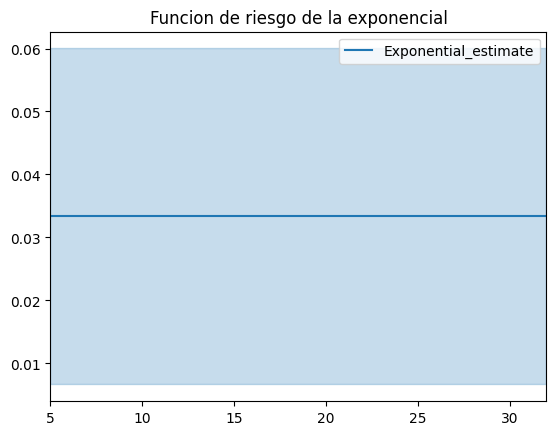

In [8]:
exponen.plot_hazard()
plt.xlim(5,32)
plt.title('Funcion de riesgo de la exponencial');

(5.0, 32.0)

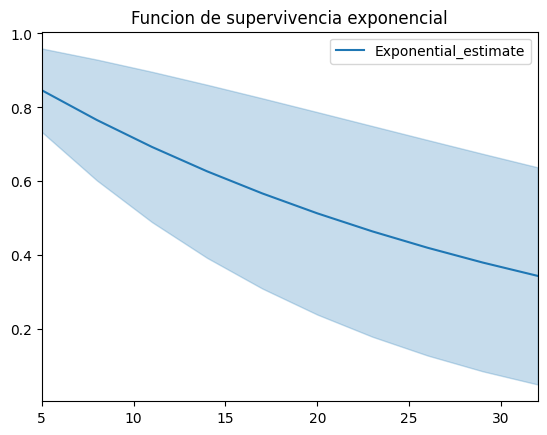

In [23]:
exponen.plot_survival_function()
plt.title('Funcion de supervivencia exponencial')
plt.xlim(5,32)

(5.0, 32.0)

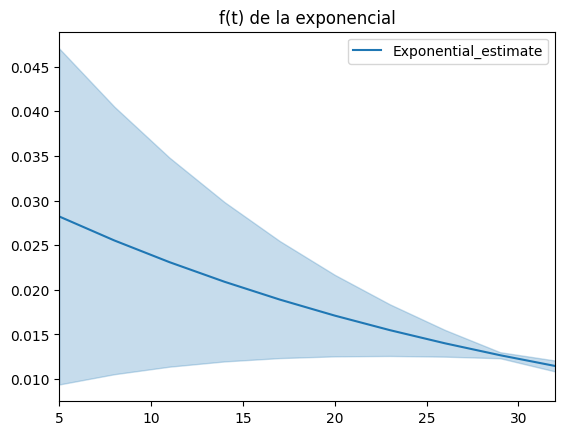

In [9]:
exponen.plot_density()
plt.xlim
plt.title('f(t) de la exponencial')
plt.xlim(recaida[' tiempo'].min(),recaida[' tiempo'].max())

In [10]:
#weibul

#suponemos que el tiempo de supervivencia se distrubuye Weibull

weibul= WeibullFitter().fit(recaida[' tiempo'],recaida[' estado'])

In [11]:
#gamma de weibul
weibul.rho_

#entonces como es 1.88 el riesgo es creciente

1.8867259500116444

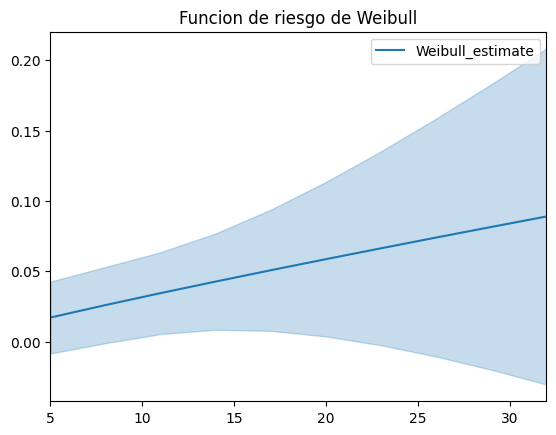

In [12]:
#h(t)
weibul.plot_hazard()
plt.title('Funcion de riesgo de Weibull')
plt.xlim(5,32);

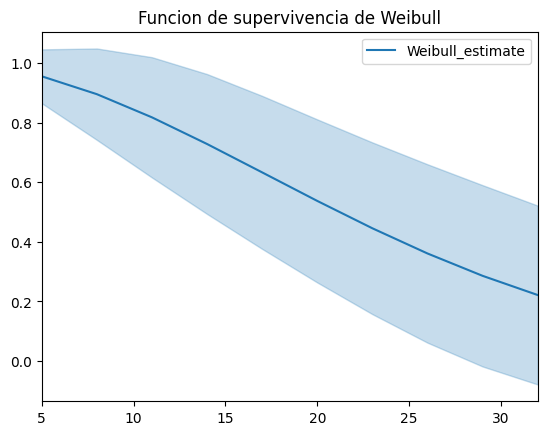

In [13]:
#S(t)
weibul.plot_survival_function()
plt.title('Funcion de supervivencia de Weibull')
plt.xlim(5,32);

Text(0.5, 1.0, '5,32')

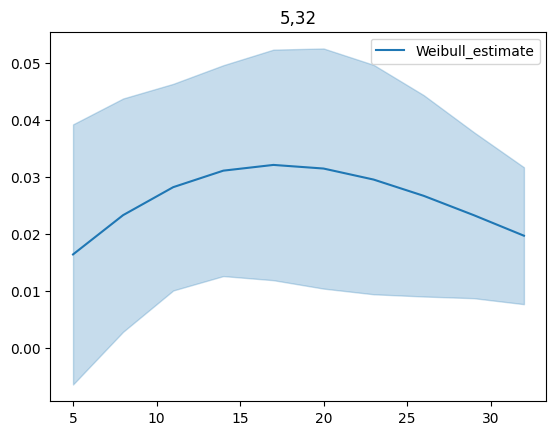

In [14]:
#f(t)
weibul.plot_density()
plt.title('5,32')

In [15]:
#Log-Normal

#suponemos que el tiempo de supervivencia se distrubuye Log-Normal

LN=LogNormalFitter().fit(recaida[' tiempo'],recaida[' estado'])


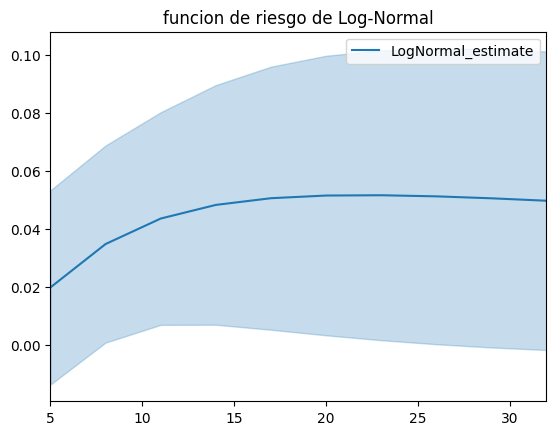

In [16]:
#h(t)
LN.plot_hazard()
plt.title('funcion de riesgo de Log-Normal')
plt.xlim(5,32);

#AQUI INICIA LA SESION 11 DEL 07 DE SEPRIEMBRE

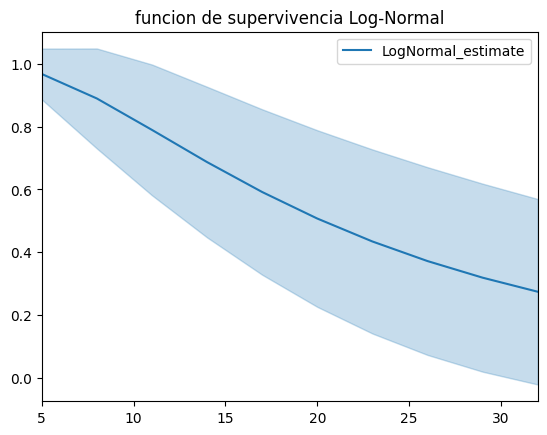

In [21]:
#S(t)
LN.plot_survival_function()
plt.title('funcion de supervivencia Log-Normal')
plt.xlim(5,32);

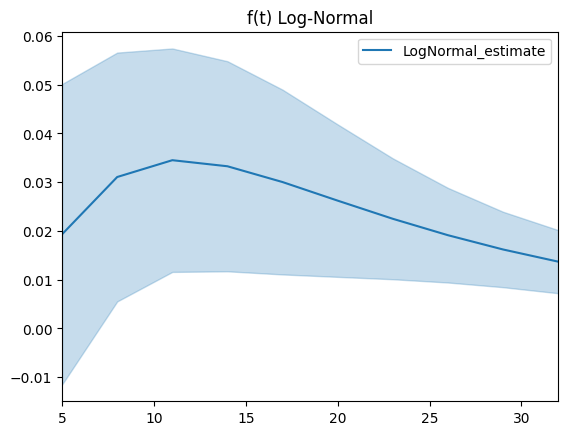

In [22]:
#f(t)
LN.plot_density()
plt.title('f(t) Log-Normal')
plt.xlim(5,32);

###Tomamos una base de datos de tiempo de supervivencia y supusimos que el tiempo de supervivencia se comportaba de forma:

###1. exponencial
###2. Weibull
###3. LogNormal



##Cual de estos tres modelos parametricos describe mejor el comportamiento de los datos?


**utiliza el criterio de Akaike (AIC):**

**$AIC = -2lnVerosimilitud + 2k$  ;       $k = numero de parametros en el modelo$**

 ### Cual es el mejor modelo segun el criterio de ACI?

####$=>$ De acuerdo con el criterio de ACI el "mejor modelo" es el que tiene menor AIC. El AIC elige modelos mas simples (no tienen muchos parametros)

In [27]:
print('Esto es el AIC de tres modelos:')
print('El AIC del modelo exponencial es ',exponen.AIC_.round(2))
print('El AIC del modelo weibull es',weibul.AIC_.round(2))
print('El AIC del modelo log-normal es',LN.AIC_.round(2))

Esto es el AIC de tres modelos:
El AIC del modelo exponencial es  54.81
El AIC del modelo weibull es 54.16
El AIC del modelo log-normal es 54.51


###De acurdo con AIC el mejor modelo, es decir el que mejor describe los datos de supervivencia de las recaidas es el modelo Weibull. Donde el riesgo de recaer es creciente a traves del tiempo